In [74]:
%matplotlib inline  
import numpy as np
import cv2 # 3.3
from matplotlib import pyplot as plt

In [2]:
cap = cv2.VideoCapture('../../vid/drone-flight.mp4')
ret, frame = cap.read()
print(ret)

True


In [3]:
cap = cv2.VideoCapture('../../vid/drone-flight.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length) # num frames

17034


In [32]:
import cv2
def get_frame(n=None, link='../../vid/drone-flight.mp4'):
    cap = cv2.VideoCapture(link)
    if n == None:
        n = np.random.randint(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.set(cv2.CAP_PROP_POS_FRAMES, n - 1)
    res, frame = cap.read()
    return frame
print(get_frame())

[[[101 169 136]
  [ 57 125  92]
  [ 64 132  99]
  ...
  [102 165 146]
  [102 165 146]
  [102 165 146]]

 [[ 92 160 127]
  [ 47 115  82]
  [ 72 140 107]
  ...
  [102 165 146]
  [102 165 146]
  [102 165 146]]

 [[ 68 139 105]
  [ 38 109  75]
  [ 86 157 123]
  ...
  [102 165 146]
  [102 165 146]
  [102 165 146]]

 ...

 [[ 42  97  90]
  [ 68 123 116]
  [ 97 155 146]
  ...
  [ 73 204 170]
  [ 58 187 153]
  [ 47 176 142]]

 [[ 33  86  84]
  [ 39  92  90]
  [ 30  87  85]
  ...
  [ 64 208 164]
  [ 70 214 170]
  [ 49 193 149]]

 [[ 50 103 101]
  [ 50 103 101]
  [ 61 118 116]
  ...
  [ 56 200 156]
  [ 55 199 155]
  [ 53 197 153]]]


In [113]:
def scale(frame, factor=.5):
    height, wid, _ = frame.shape
    scaled_wid, scaled_height = np.int(wid * factor), np.int(height * factor)
    frame = cv2.resize(frame, (scaled_wid, scaled_height))
    return frame

In [53]:
def get_orb_kp(frame, orb=cv2.ORB_create()):
    frame = scale(frame)
    kp = orb.detect(frame)
    kp_drawn = cv2.drawKeypoints(frame, kp, None, color=(0, 255, 0))
    return kp, kp_drawn

In [80]:
def draw(info):
    for frame, name in info:
        cv2.imshow(name, frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def draw_single(frame, name):
    cv2.imshow(name, frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [119]:
kp, frame = get_orb_kp(scale(get_frame(), 1))
draw([(frame, 'frame')])

In [132]:
def kp_to_pairs(kp, dim):
    max_y, max_x, _ = dim
    out = np.zeros((len(kp), 2))
    for i in range(len(kp)):
        x, y = kp[i].pt
        
        out[i] = np.array([x, max_y-y])
    return out
Z = kp_to_pairs(kp, frame.shape)

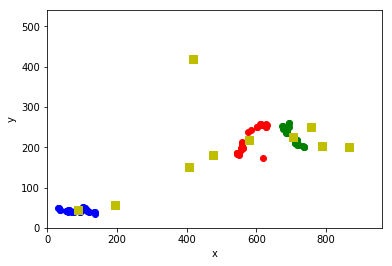

In [138]:
def plot(Z, dim):
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now separate the data, Note the flatten()
    A = Z[label.ravel()==0]
    B = Z[label.ravel()==1]
    C = Z[label.ravel()==2]
    # Plot the data
    plt.scatter(A[:,0],A[:,1], c = 'r')
    plt.scatter(B[:,0],B[:,1],c = 'b')
    plt.scatter(C[:,0],C[:,1],c = 'g')
    plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
    plt.xlabel('x'),plt.ylabel('y')
    y_max, x_max, _  = dim
    plt.axis([0, x_max, 0, y_max])
    plt.show()
    draw_single(frame, 'frame')
plot(Z, frame.shape)

In [139]:
def tot_anal():
    kp, frame = get_orb_kp(scale(get_frame(), 1))
    dim = frame.shape
    Z = kp_to_pairs(kp, dim)
    plot(Z, dim)

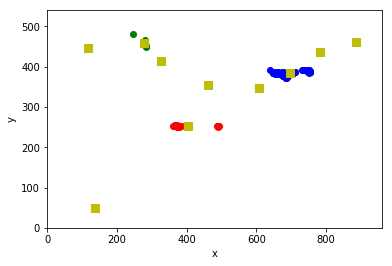

In [142]:
tot_anal()

In [179]:
def get_centers(Z, num=10):
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,num,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    return center
centers = get_centers(Z)

In [180]:
def plot_boxes(frame, name, centers, dim):
    y_max, x_max, _  = dim
    
    for i in range(len(centers)):
        x, y = centers[i]
        x, y = np.int(x), np.int(y_max - y)
        top_left = x - 50, y - 50
        bot_right = x + 50, y + 50
        frame = cv2.rectangle(frame, top_left, bot_right, (0, 255, 0),  1)
        # frame = cv2.circle(frame, (x, y), 50, (0, 255, 0),  1)
    draw_single(frame, name)

In [181]:
plot_boxes(frame, 'frame', centers, frame.shape)

In [184]:
def plot_ex():
    kp, frame = get_orb_kp(scale(get_frame(), 1))
    dim = frame.shape
    Z = kp_to_pairs(kp, dim)
    centers = get_centers(Z, 100)
    plot_boxes(frame, 'frame', centers, dim)

In [185]:
plot_ex()